# Аналитика в авиакомпании

Компания «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. 

Необходимо понять предпочтения пользователей, покупающих билеты на те или иные направления. 

В рамках данного исследования изучим базу данных и проанализируем спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

Исходя из поставленных целей и задач разделим исследование на несколько частей:

[Часть 1. Изучение общей информации](#1.) 
* [1.1. Загрузка библиотек, импорт файлов с данными.](#1.1.)
* [1.2. Изучение общей информации о данных.](#1.2.)
* [1.3. Преобразование типа данных.](#1.3.)

[Часть 2. Исследовательский анализ данных](#2.)
* [2.1. Топ-10 городов по количеству рейсов.](#2.1.)
* [2.2. Зависимость количества рейсов от модели самолетов.](#2.2.)
* [2.3. Зависимость количества рейсов от города.](#2.3.)
* [2.4. Зависимость количества рейсов от топ-10 городов.](#2.4.)

В заключении сделаем выводы и поясним полученнеы результаты.

### Часть 1. Изучение общей информации

#### 1.1. Загрузка библиотек, импорт файлов с данными <a id='1.1.'></a> 

Загрузим необходимые библиотеки и считаем csv файлы.

In [2]:
# Импортируем библиотеки, необходимые для исследования
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Прочитаем результат первого запроса методом read_csv и посмотрим на датафейм
model = pd.read_csv('/datasets/query_1.csv').sort_values(by='flights_amount', ascending=False)
model

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


In [4]:
# Прочитаем результат третьего запроса методом read_csv и посмотрим на первые 5 строк с помощью метода head
city = pd.read_csv('/datasets/query_3.csv').sort_values(by='average_flights', ascending=False)
city.head()

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581


#### 1.2. Изучение общей информации о данных <a id='1.2.'></a>

Рассмотрим более подробно общую информацию о датасете model, его признакам и их типам.

In [5]:
# Посмотрим общую информацию о датафрейме model, воспользовавшись методом info
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 6 to 4
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [6]:
# Рассмотрим основные статистические характеристики данных датафрейма model по каждому числовому признаку методом describe 
model.describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
flights_amount,8,2035.62,1965.2,300,605.25,795,4250.25,4557


In [7]:
# Проверим данные датафрейма model на наличие дубликатов, вызвав метод duplicated()
print('Количество дубликатов в исходных данных:', model.duplicated().sum())

Количество дубликатов в исходных данных: 0


Рассмотрим детально, какие столбцы и какую информацию содержит датасет model:

- model — модель самолета  
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года  

Пропусков и дубликатов датасет не содержит, все данные приведены к корректным типам, что позволяет нам продожить дальнейшую работу с данными без внесения каких-либо изменений.

Рассмотрим более подробно общую информацию о датасете city, его признакам и их типам.

In [7]:
# Посмотрим общую информацию о датафрейме city, воспользовавшись методом info
city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 43 to 49
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [8]:
# Рассмотрим основные статистические характеристики данных датафрейма city по каждому числовому признаку методом describe 
city.describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
average_flights,101,5.49419,13.1198,1,2,3,5.87097,129.774


In [9]:
# Проверим данные датафрейма model на наличие дубликатов, вызвав метод duplicated()
print('Количество дубликатов в исходных данных:', city.duplicated().sum())

Количество дубликатов в исходных данных: 0


Разберем более подробно, какие столбцы и какую информацию содержит датасет city:

- city — город
- average_flights — среднее количестве рейсов, прибывающих в город city за день в августе 2018 года

Пропусков и дубликатов обнаружено не было.  

Типы данных обозначены верно, но для дальнейшего удобства и большей наглядности, можно привести значения показателя average_flights к 2 знакам после запятой. 

#### 1.3. Преобразование типа данных <a id='1.3.'></a>

Приведем данные столбца 'average_flights' датасета city к сотым значениям после запятой для большего удобства работы с ними.

In [10]:
# Приведем данные показателя average_flights к двум знакам после плавающей запятой
pd.set_option('display.float_format','{:.2f}'.format)
city.head()

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32


### Часть 2. Исследовательский анализ данных

#### 2.1. Топ-10 городов по количеству рейсов <a id='2.1.'></a>

Найдем топ-10 городов по среднему количеству совершенных рейсов за день в августе 2018 года.

In [11]:
# Запишем в переменную top_cities 10 городов с наибольшим средним количестом рейсов
top_cities = city.nlargest(10, 'average_flights', keep='first')

# Выведем полученный результат
top_cities

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


#### 2.2. Зависимость количества рейсов от модели самолетов <a id='2.2.'></a>

Найдем зависимость количества рейсов, приходящихся на сентябрь 2018 года, от модели самолетов.

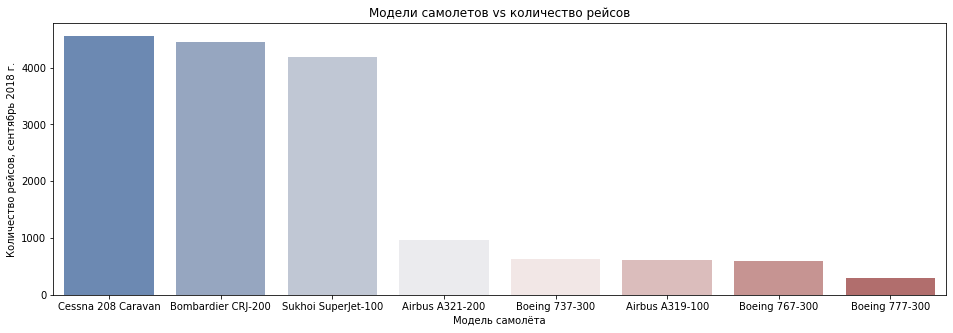

In [12]:
# Построим столбчатцю диаграмму 
plt.figure(figsize=(16,5)) 
sns.barplot(x='model', y='flights_amount', data=model, palette="vlag")
plt.title("Модели самолетов vs количество рейсов")
plt.xlabel("Модель самолёта")
plt.ylabel("Количество рейсов, сентябрь 2018 г.")
plt.show()

Лидером данного рейтинга явлется - Cessna 208 Caravan. Это региональный, ближнемагистральный / узкофюзеляжный самолёт. Максимальное количество пассажиров до 14.  
Второе место занимает - Bombardier CRJ-200. Это региональный реактивный узкофюзеляжный самолет, который может выполнять рейсы в условиях высокогорных аэродромов и сложных метеоусловиях, что немаловажно для России. Данная модификация самолета позволяет перевозить в его салоне - до 50 пассажирова.  
Третье место среди лидеров занимает - Sukhoi SuperJet-100. Это отечественный двухмоторный авиалайнер, рассчитанный на перевозку 98 (до 108) пассажиров на дальность 3000 или 4600 км.  
Иными словами, наибольшее количество рейсов приходится на модели самолетов малой вместимости.

#### 2.3. Зависимость количества рейсов от города <a id='2.3.'></a>

Найдем зависимость среднего количества рейсов, совершенных за один день и приходящихся на август 2018 года, от города прилета.

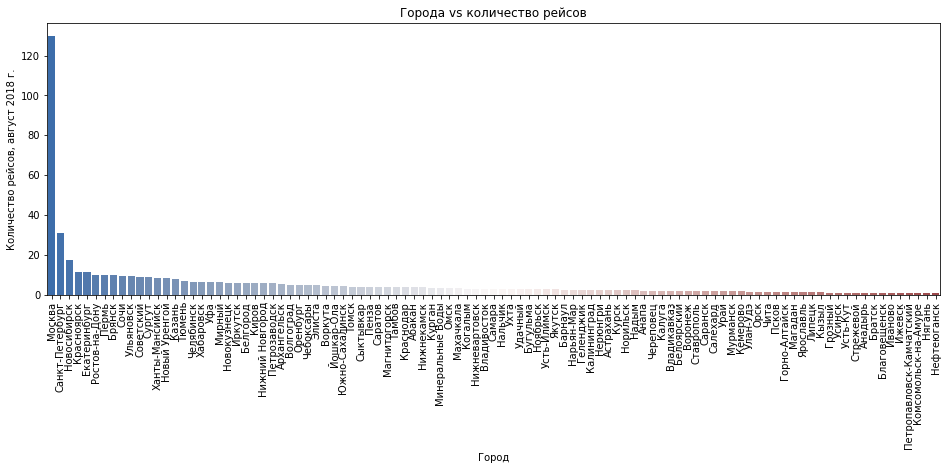

In [13]:
# Построим столбчатую диаграмму
plt.figure(figsize=(16,5)) 
sns.barplot(x='city', y='average_flights', data=city, palette="vlag")
plt.title("Города vs количество рейсов")
plt.xlabel("Город")
plt.xticks(rotation=90)
plt.ylabel("Количество рейсов, август 2018 г.")
plt.show()

Количество совершенных пассажирских рейсов в тот или иной город сильно разнится и на это могут оказывать влияние следующие причины: количество аэропортов, находящихся в городе; количество трансферных полетов; тот факт, что появились направления, которые отсутствовали десятилетиями - Абакан, Новокузнецк, Томск и пр.; на некоторых внутренних направлениях авиакомпаниям приходится конкурировать с очень развитым железнодорожным сообщением и т.д.

#### 2.4. Зависимость количества рейсов от топ-10 городов <a id='2.4.'></a>

Построим график зависимости количества рейсов, приходящихся на август 2018 года, от топ-10 городов прилета.

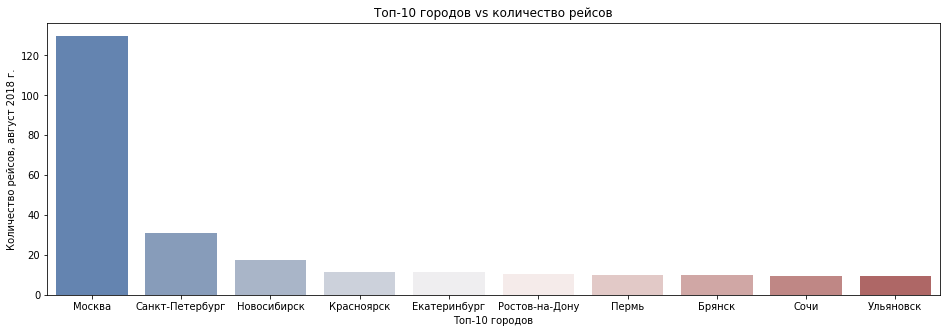

In [14]:
# Построим столбчатую диаграмму
plt.figure(figsize=(16,5)) 
sns.barplot(x='city', y='average_flights', data=top_cities, palette="vlag")
plt.title("Топ-10 городов vs количество рейсов")
plt.xlabel("Топ-10 городов")
plt.ylabel("Количество рейсов, август 2018 г.")
plt.show()

Доминирует по количеству совершенных рейсов город Москва и это вполне логично. Московский авиационный узел играет важнейшую роль для всего воздушного транспорта России и других стран, т.к. часто является промежуточным звеном для путешествия людей из менее населенных и развитых в плане авиасообщения городов.  
Второе место отводится культурной столице - городу Санк-Петербург. Несмотря на то, что показатели этого города в разы маньше, чем у лидера, причина популярности аналогичная.  
На третьем месте находится Новосибирск — третий город России по населению с международным аэропортом Толмачёво, крупнейшим за Уралом транзитныйм авиаузлом на важнейших направлениях между Европой и Азией. То есть изначально база авиационных пассажиров здесь выше, чем в любом соседнем городе. Если потенциал выше, значит и интерес авиакомпаний больше. А это, в свою очередь, формирует более конкурентную среду, которая позволяет, с одной стороны, формировать более низкие тарифы, с другой — более разветвленную маршрутную сеть.  
Остальные города из топ-10 имеют примерно одинаковые показатели выполненных рейсов.

### Общий вывод

В рамках данной работы мы изучили исходные данные, проверили их на пропуски, дубликаты, их типы на корректность и внесли изменения там, где это было небходимо.

В процессе работы мы построили несколько графиков и изучили с их помощью зависимости: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов.

Из построенных графиков сделали вывод, что абсолютными лидерами по количеству совершенных рейсов являются модели самолетов малой вместимости (примерно до 100 пассажиров): Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100. 

На количество рейсов, совершенных за один день в августе 2018 года, оказывает влияние ряд факторов, но все же можно выделить абсолютных лидеров по среднему количеству рейсов, ими стали: Москва, Санкт-Петербург и Новосибирск - крупнейшие региональные и международные узлы России.